In [3]:
from google.colab import files
uploaded = files.upload()



Saving GreenHouse Gas Emission Dataset.csv to GreenHouse Gas Emission Dataset.csv


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/tmp/ipython-input-6-406715878.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_avg.values, y=industry_avg.index, palette="coolwarm")


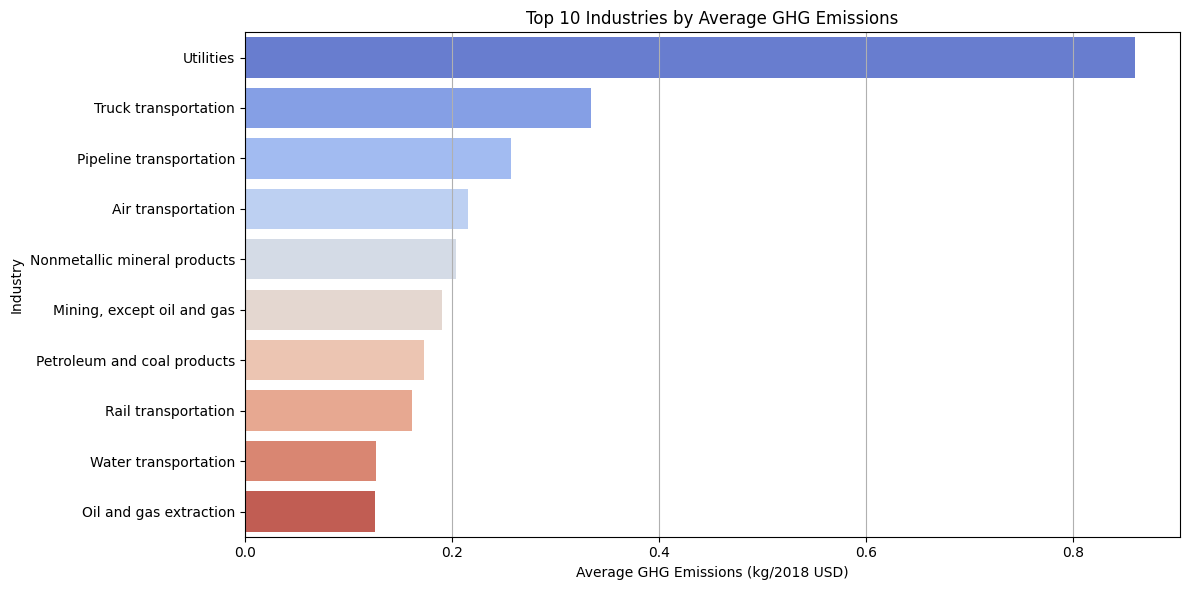

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("GreenHouse Gas Emission Dataset.csv")

# Clean the data (skip first row if it's a duplicate header)
df = df[1:].copy()

# Convert emission column to numeric
df["Supply Chain Emission Factors without Margins"] = pd.to_numeric(
    df["Supply Chain Emission Factors without Margins"], errors="coerce"
)

# Group by industry and calculate average emissions
industry_avg = df.groupby("Industry Name")[
    "Supply Chain Emission Factors without Margins"
].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_avg.values, y=industry_avg.index, palette="coolwarm")
plt.xlabel("Average GHG Emissions (kg/2018 USD)")
plt.ylabel("Industry")
plt.title("Top 10 Industries by Average GHG Emissions")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


/tmp/ipython-input-7-1230806609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


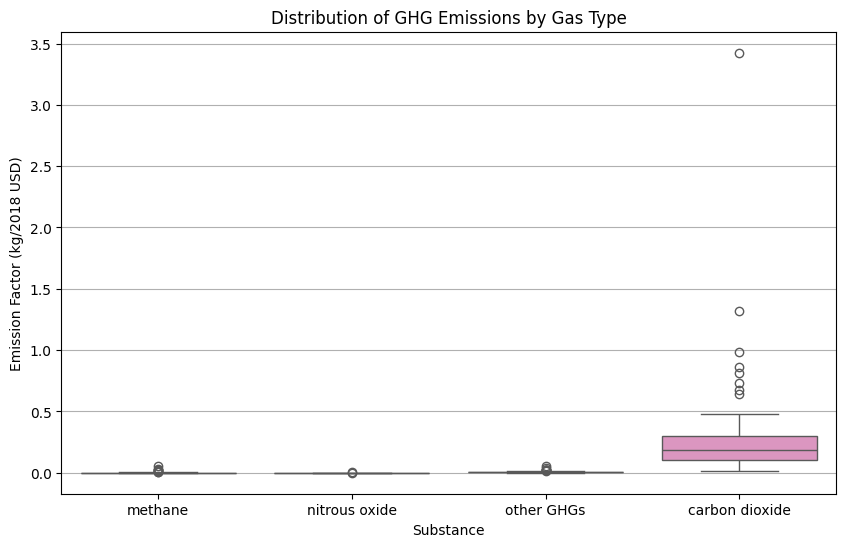

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Substance",
    y="Supply Chain Emission Factors without Margins",
    data=df,
    palette="Set2"
)
plt.title("Distribution of GHG Emissions by Gas Type")
plt.ylabel("Emission Factor (kg/2018 USD)")
plt.grid(True, axis='y')
plt.show()


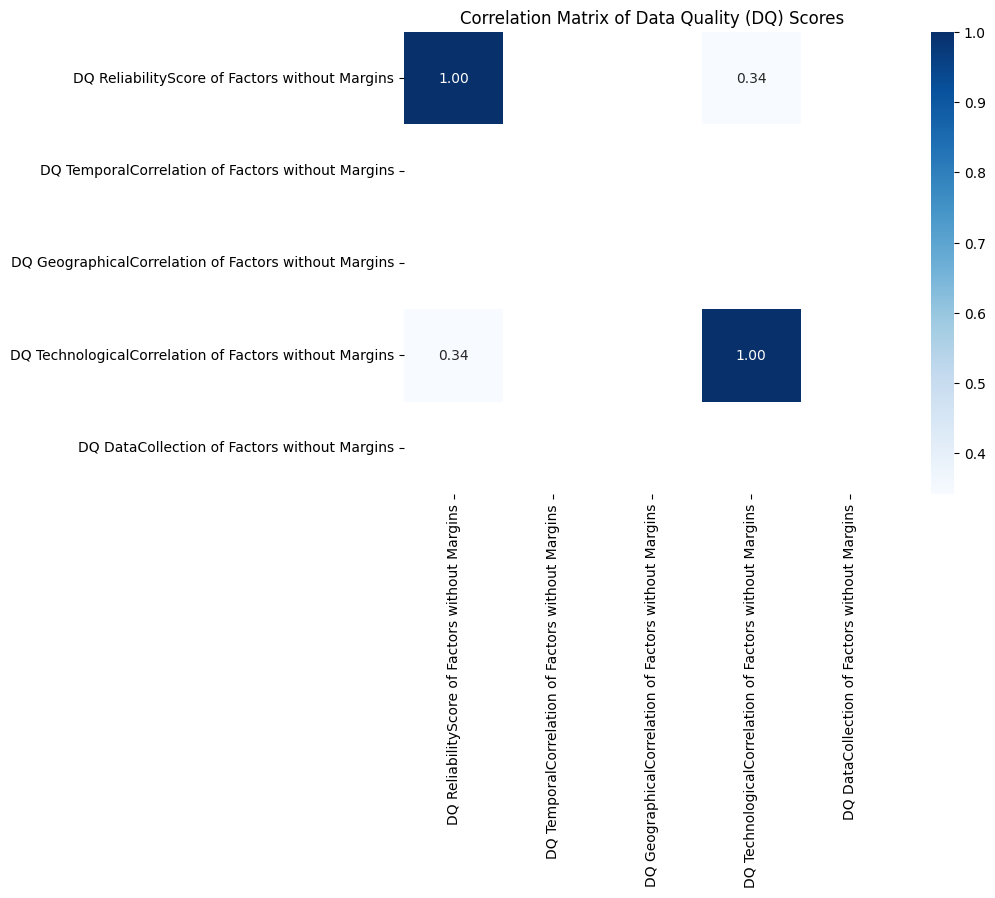

In [8]:
# Select only DQ columns
dq_cols = df.filter(like="DQ").astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(dq_cols.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix of Data Quality (DQ) Scores")
plt.show()


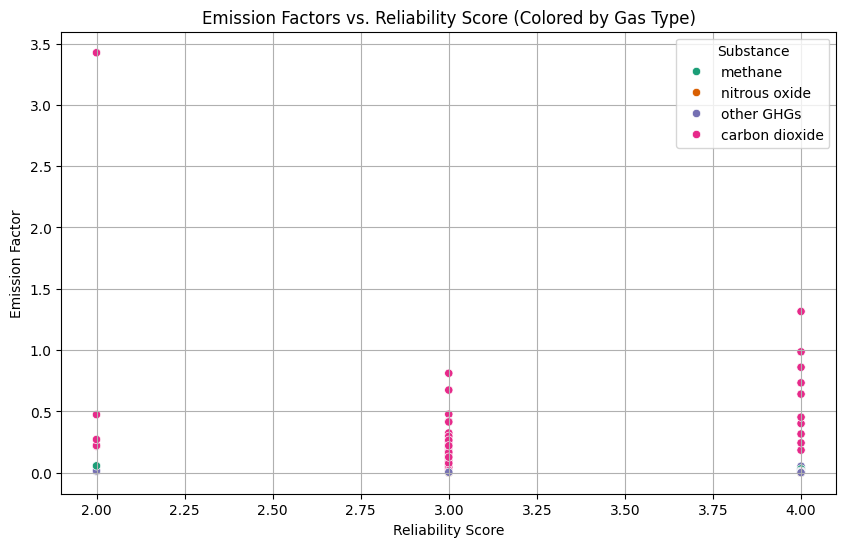

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="DQ ReliabilityScore of Factors without Margins",
    y="Supply Chain Emission Factors without Margins",
    hue="Substance",
    data=df,
    palette="Dark2"
)
plt.title("Emission Factors vs. Reliability Score (Colored by Gas Type)")
plt.xlabel("Reliability Score")
plt.ylabel("Emission Factor")
plt.grid(True)
plt.show()
